## I Introduction To The Project

## Identity 
- Nama : Syahrul Budi Rahmadan
- NIM : 256150100111013
- Mata Kuliah Matrikulasi : Alpro

## Dataset Big Picture

- [Dataset](https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets/data)

## Understanding about Stress

At its core, stress is your body's natural response to any demand or threat. When you sense danger—whether it's real or imagined—the body's defenses kick into a high-gear, rapid, automatic process known as the "fight-or-flight" reaction, or the stress response.

The stress response is the body’s way of protecting you. When working properly, it helps you stay focused, energetic, and alert. In emergency situations, stress can save your life—giving you extra strength to defend yourself, for example, or spurring you to slam on the brakes to avoid a car accident.

## About the Dataset:
This dataset investigates the root causes of stress among students, derived from a nationwide survey. It includes around 20 key features grouped under five scientifically identified categories:

🧠 Psychological Factors
- anxiety_level
- self_esteem
- mental_health_history
- depression

🏥 Physiological Factors
- headache
- blood_pressure
- sleep_quality
- breathing_problem

🌆 Environmental Factors
- noise_level
- living_conditions
- safety
- basic_needs

🎓 Academic Factors
- academic_performance
- study_load
- teacher_student_relationship
- future_career_concerns

🤝 Social Factors
- social_support
- peer_pressure
- extracurricular_activities
- bullying

## Goals
Developers aiming to make a model that can predict stress as accurate as possible so we as human can prevent it

## II Libraries

In [399]:
# For table querying and mathematical
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [400]:
# Feature Engineering library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder

In [401]:
# Data Balancing
from imblearn.over_sampling import SMOTENC

In [402]:
# Algorithms
from sklearn.neighbors import KNeighborsClassifier

In [403]:
# Hypermarameter tuning
from sklearn.model_selection import GridSearchCV

In [404]:
# For Multiclass
from sklearn.multiclass import OneVsRestClassifier

In [405]:
# Metric
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, f1_score, classification_report, r2_score, mean_absolute_error

In [406]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [407]:
# For Model exporting and importing
import pickle

In [408]:
from sklearn.pipeline import Pipeline

In [409]:
import time

import warnings
warnings.filterwarnings('ignore')

## III Data Import & Check For Dataframes Quality

In [410]:
stress_dataset = pd.read_csv('Stress_Dataset.csv')
stress_level = pd.read_csv('StressLevelDataset.csv')

In [411]:
stress_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    int64 
 7   Have you

In [412]:
stress_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [413]:
stress_level.head(10)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
5,20,13,1,21,3,3,1,4,3,2,...,1,2,5,2,5,1,4,4,5,2
6,4,26,0,6,1,2,4,1,1,4,...,4,5,1,4,1,3,2,2,1,0
7,17,3,1,22,4,3,1,5,3,1,...,1,1,3,2,4,1,4,4,5,2
8,13,22,1,12,3,1,2,4,3,3,...,3,3,3,2,3,3,3,2,2,1
9,6,8,0,27,4,3,1,2,0,5,...,2,2,2,1,5,1,5,3,4,1


In [414]:
stress_dataset.head(10)

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...
5,0,20,3,4,3,2,3,3,4,1,...,2,3,1,2,3,2,4,4,4,Eustress (Positive Stress) - Stress that motiv...
6,0,20,2,2,1,4,4,3,4,1,...,4,4,2,3,4,3,3,3,2,Eustress (Positive Stress) - Stress that motiv...
7,0,20,5,5,5,2,4,2,1,1,...,1,4,2,4,3,1,1,1,5,Eustress (Positive Stress) - Stress that motiv...
8,0,20,3,2,1,5,3,5,1,1,...,4,4,2,4,4,3,1,5,1,Eustress (Positive Stress) - Stress that motiv...
9,0,21,3,4,2,1,1,2,1,2,...,1,1,1,1,1,1,2,4,2,No Stress - Currently experiencing minimal to ...


In [415]:
print("Check Missing Values in DataFrame Stress:")
print(stress_dataset.isnull().sum())

Check Missing Values in DataFrame Stress:
Gender                                                                  0
Age                                                                     0
Have you recently experienced stress in your life?                      0
Have you noticed a rapid heartbeat or palpitations?                     0
Have you been dealing with anxiety or tension recently?                 0
Do you face any sleep problems or difficulties falling asleep?          0
Have you been dealing with anxiety or tension recently?.1               0
Have you been getting headaches more often than usual?                  0
Do you get irritated easily?                                            0
Do you have trouble concentrating on your academic tasks?               0
Have you been feeling sadness or low mood?                              0
Have you been experiencing any illness or health issues?                0
Do you often feel lonely or isolated?                                 

In [416]:
print("Check Missing Values in DataFrame Stress Level:")
print(stress_level.isnull().sum())

Check Missing Values in DataFrame Stress Level:
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


No missing values for both dataframes

In [417]:
# Clean datasets by dropping duplicates
stress_level_clean = stress_level.drop_duplicates()
stress_dataset_clean = stress_dataset.drop_duplicates()

print(f"StressLevelDataset after cleaning: {stress_level_clean.shape}")
print(f"Stress_Dataset after cleaning: {stress_dataset_clean.shape}")

StressLevelDataset after cleaning: (1100, 21)
Stress_Dataset after cleaning: (816, 26)


## IV Exploratory Data Analysis I (Stress Dataset)

In [418]:
for column in stress_dataset.columns:
    unique_values = stress_dataset[column].unique()
    print(f"Unique values in {column}:", unique_values)

Unique values in Gender: [0 1]
Unique values in Age: [ 20  21  19  18  14  17  36  22  28  41  32  37  15  24 100]
Unique values in Have you recently experienced stress in your life?: [3 2 5 4 1]
Unique values in Have you noticed a rapid heartbeat or palpitations?: [4 3 2 5 1]
Unique values in Have you been dealing with anxiety or tension recently?: [2 3 1 5 4]
Unique values in Do you face any sleep problems or difficulties falling asleep?: [5 1 2 4 3]
Unique values in Have you been dealing with anxiety or tension recently?.1: [1 2 3 4 5]
Unique values in Have you been getting headaches more often than usual?: [2 1 3 4 5]
Unique values in Do you get irritated easily?: [1 4 2 3 5]
Unique values in Do you have trouble concentrating on your academic tasks?: [2 4 3 1 5]
Unique values in Have you been feeling sadness or low mood?: [2 3 5 4 1]
Unique values in Have you been experiencing any illness or health issues?: [3 1 2 4 5]
Unique values in Do you often feel lonely or isolated?: [1 2 3 

In [419]:
# Remove only the maximum outlier row for each numerical column in stress_dataset_clean
df = stress_dataset_clean.copy()
for col in df:
    max_val = df[col].max()
    # Remove only the first occurrence of the max value (outlier) in this column
    idx = df[df[col] == max_val].index
    if len(idx) > 0:
        df = df.drop(idx[0])
df = df.reset_index(drop=True)
print(f"Shape after removing max outlier from each column: {df.shape}")

Shape after removing max outlier from each column: (790, 26)


In [420]:
stress_dataset_no_outlier = df
stress_dataset_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                790 non-null    int64 
 1   Age                                                                   790 non-null    int64 
 2   Have you recently experienced stress in your life?                    790 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   790 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               790 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        790 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             790 non-null    int64 
 7   Have you

## V Exploratory Data Analysis II (Stress Level Dataset)

In [421]:
for column in stress_level_clean.columns:
    unique_values = stress_level_clean[column].unique()
    print(f"Unique values in {column}:", unique_values)

Unique values in anxiety_level: [14 15 12 16 20  4 17 13  6  5  9  2 11  7 21  3 18  0  8  1 19 10]
Unique values in self_esteem: [20  8 18 12 28 13 26  3 22 15 23 21 25  1 27  5  6  9 29 30  4 19 16  2
  0 14  7 17 24 11 10]
Unique values in mental_health_history: [0 1]
Unique values in depression: [11 15 14  7 21  6 22 12 27 25  8 24  3  1  0  5 26 20 10  9  2 16  4 13
 18 23 17 19]
Unique values in headache: [2 5 4 3 1 0]
Unique values in blood_pressure: [1 3 2]
Unique values in sleep_quality: [2 1 5 4 3 0]
Unique values in breathing_problem: [4 2 3 1 5 0]
Unique values in noise_level: [2 3 4 1 0 5]
Unique values in living_conditions: [3 1 2 4 5 0]
Unique values in safety: [3 2 4 1 5 0]
Unique values in basic_needs: [2 3 1 4 5 0]
Unique values in academic_performance: [3 1 2 4 5 0]
Unique values in study_load: [2 4 3 5 1 0]
Unique values in teacher_student_relationship: [3 1 2 4 5 0]
Unique values in future_career_concerns: [3 5 2 4 1 0]
Unique values in social_support: [2 1 3 0]
Un

## VI Exploratory Data Analysis III

In [422]:
stress_dataset_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                790 non-null    int64 
 1   Age                                                                   790 non-null    int64 
 2   Have you recently experienced stress in your life?                    790 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   790 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               790 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        790 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             790 non-null    int64 
 7   Have you

In [423]:
stress_level_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [424]:
# Randomly sample 791 rows from stress_level_clean and reset the index
stress_level_clean = stress_level_clean.sample(n=790, random_state=42).reset_index(drop=True)
print(stress_level_clean.shape)

(790, 21)


In [425]:
# Concatenate stress_dataset_no_outlier and stress_level_clean along columns (axis=1)
concatenated_df = pd.concat([stress_dataset_no_outlier.reset_index(drop=True), stress_level_clean.reset_index(drop=True)], axis=1)
print(concatenated_df.shape)
concatenated_df.head()

(790, 47)


,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,0,20,2,3,2,1,1,1,1,4,...,1,2,5,1,5,1,5,5,5,2
1,0,20,3,3,3,2,2,4,4,4,...,5,4,1,5,1,3,2,1,1,0
2,0,20,3,4,3,2,3,3,4,1,...,2,3,3,3,2,3,3,2,2,1
3,0,20,2,2,1,4,4,3,4,1,...,3,3,2,2,2,2,3,2,3,1
4,1,19,2,1,2,4,3,3,2,2,...,4,4,1,4,1,3,1,2,1,0


In [426]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 47 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                790 non-null    int64 
 1   Age                                                                   790 non-null    int64 
 2   Have you recently experienced stress in your life?                    790 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   790 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               790 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        790 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             790 non-null    int64 
 7   Have you

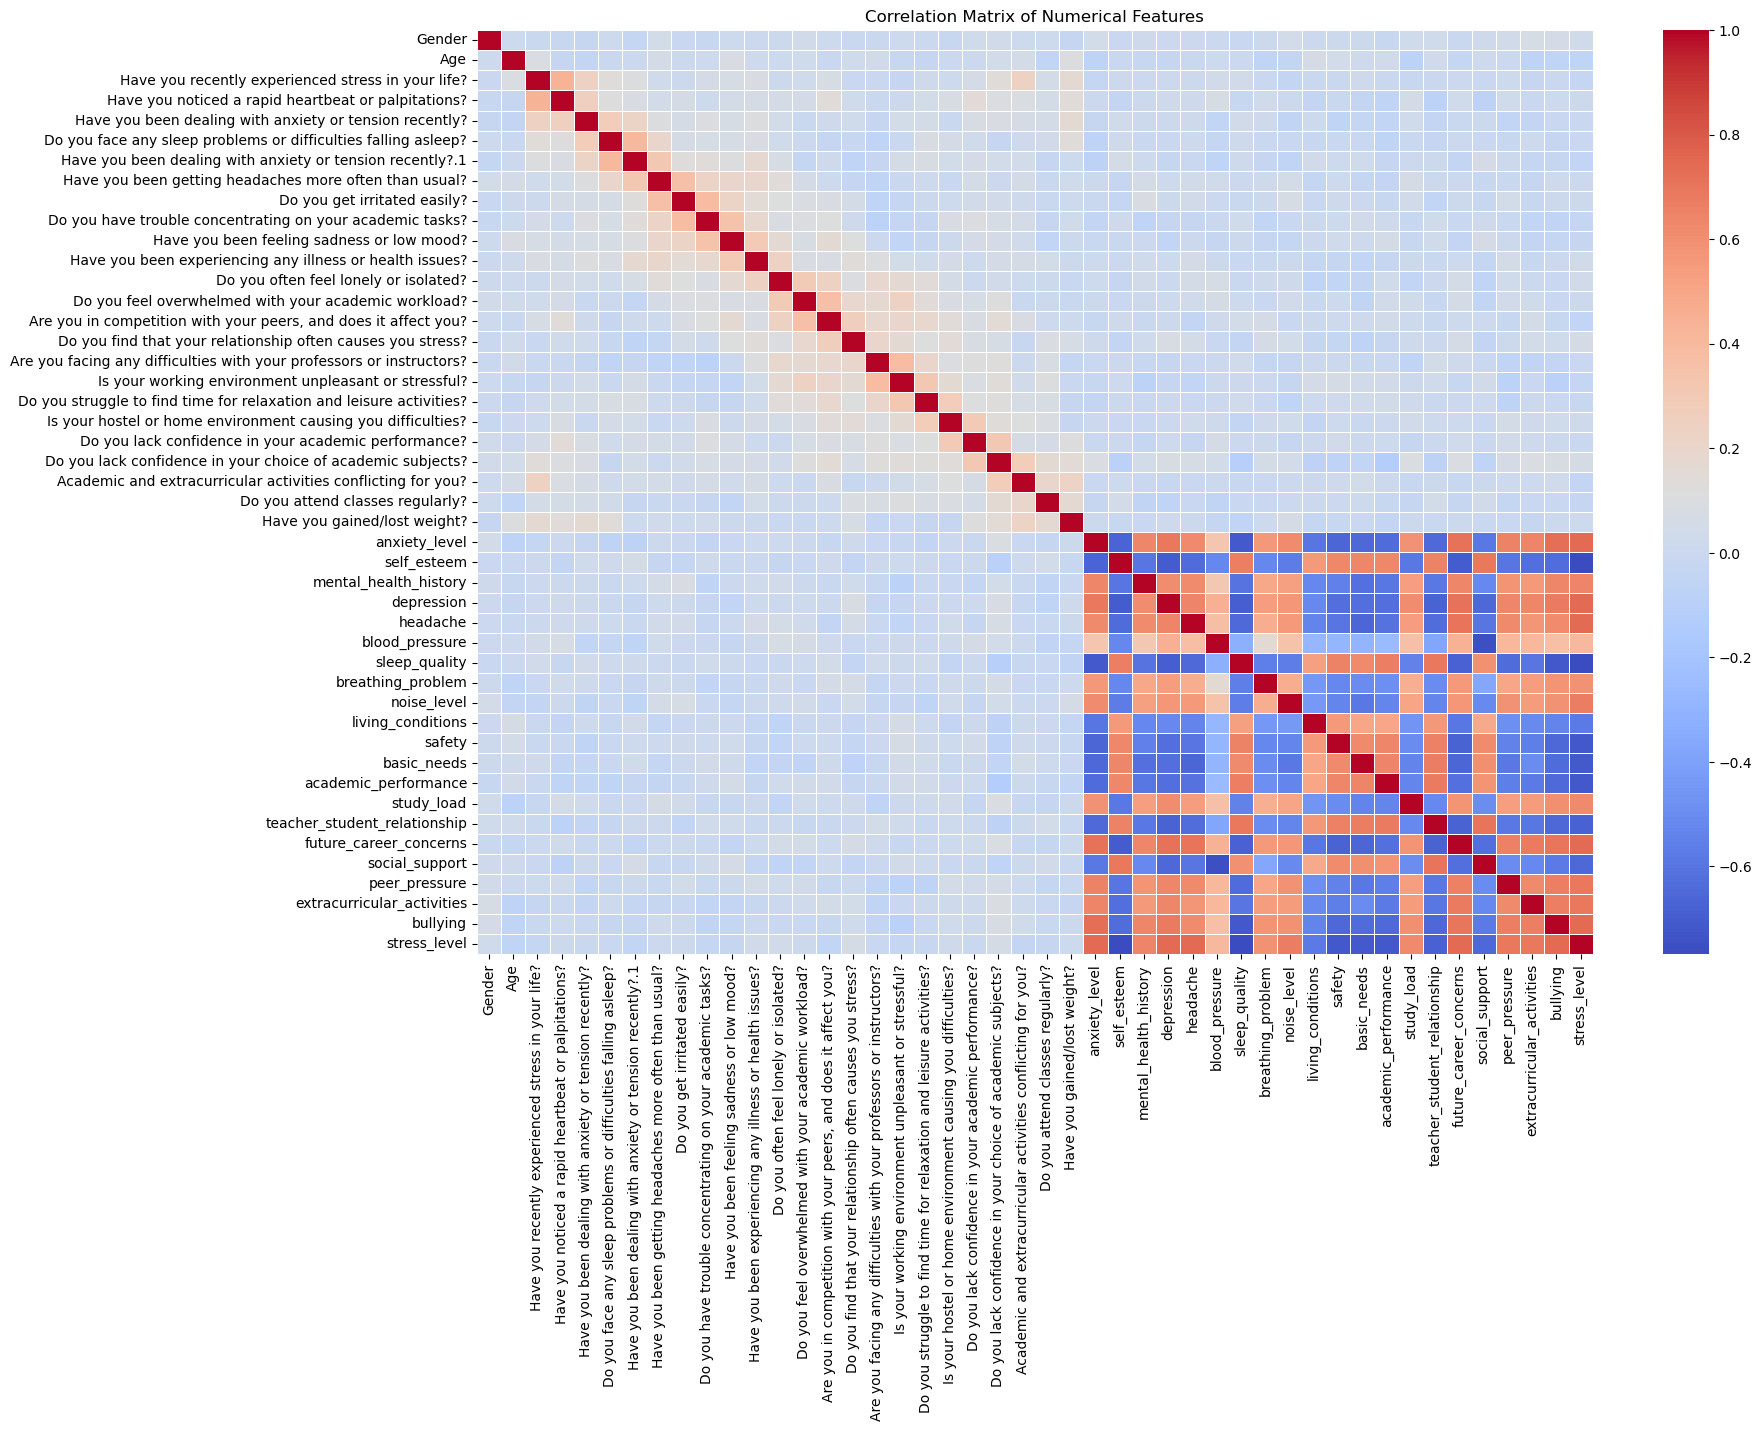

Top features correlated with 'stress_level':


headache                      0.742767
depression                    0.742114
future_career_concerns        0.740570
anxiety_level                 0.739229
bullying                      0.739092
peer_pressure                 0.694418
extracurricular_activities    0.694030
noise_level                   0.675207
mental_health_history         0.645171
study_load                    0.620331
Name: stress_level, dtype: float64


Least correlated features with 'stress_level':


Are you in competition with your peers, and does it affect you?   -0.043804
Age                                                               -0.061448
living_conditions                                                 -0.580483
social_support                                                    -0.654473
teacher_student_relationship                                      -0.683626
basic_needs                                                       -0.706718
safety                                                            -0.713116
academic_performance                                              -0.717765
sleep_quality                                                     -0.762894
self_esteem                                                       -0.767759
Name: stress_level, dtype: float64

Unique values in 'Which type of stress do you primarily experience?': ['Eustress (Positive Stress) - Stress that motivates and enhances performance.'
 'No Stress - Currently experiencing minimal to no stress.'
 'Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.']

No columns with low variance found.

You can prioritize features with higher correlation to 'stress_level' and consider dropping low-variance or redundant columns. Also, review categorical columns for encoding if needed.


In [427]:
# Display correlation matrix for numerical features
plt.figure(figsize=(18, 12))
corr = concatenated_df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Show top correlations with the target variable 'stress_level'
if 'stress_level' in concatenated_df.columns:
    target_corr = corr['stress_level'].drop('stress_level').sort_values(ascending=False)
    print("Top features correlated with 'stress_level':")
    display(target_corr.head(10))
    print("\nLeast correlated features with 'stress_level':")
    display(target_corr.tail(10))

# Check unique values for categorical/object columns
cat_cols = concatenated_df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"Unique values in '{col}':", concatenated_df[col].unique())

# Check for low-variance columns
low_var = concatenated_df.loc[:, concatenated_df.nunique() <= 1].columns.tolist()
if low_var:
    print("\nColumns with low variance (may be dropped):", low_var)
else:
    print("\nNo columns with low variance found.")

# Summary:
print("\nYou can prioritize features with higher correlation to 'stress_level' and consider dropping low-variance or redundant columns. Also, review categorical columns for encoding if needed.")

## VII Feature Engineering

In [428]:
X = concatenated_df.drop(['stress_level'], axis=1)
y = concatenated_df['stress_level']

In [429]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 46 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                790 non-null    int64 
 1   Age                                                                   790 non-null    int64 
 2   Have you recently experienced stress in your life?                    790 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   790 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               790 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        790 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             790 non-null    int64 
 7   Have you

In [430]:
X = concatenated_df.iloc[:, [0, 1, 26, 27, 29, 30, 36, 42]]

In [431]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          790 non-null    int64
 1   Age             790 non-null    int64
 2   anxiety_level   790 non-null    int64
 3   self_esteem     790 non-null    int64
 4   depression      790 non-null    int64
 5   headache        790 non-null    int64
 6   safety          790 non-null    int64
 7   social_support  790 non-null    int64
dtypes: int64(8)
memory usage: 49.5 KB


In [432]:
X.head(10)

,Gender,Age,anxiety_level,self_esteem,depression,headache,safety,social_support
0,0,20,21,15,26,3,2,1
1,0,20,3,26,1,1,4,3
2,0,20,11,15,9,2,3,3
3,0,20,10,24,12,2,2,2
4,1,19,6,26,3,1,5,3
5,0,19,10,20,13,2,3,2
6,1,19,15,14,19,3,1,1
7,0,19,2,29,1,1,5,3
8,1,19,14,20,10,3,3,3
9,0,19,20,3,22,0,5,0


In [433]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 790 entries, 0 to 789
Series name: stress_level
Non-Null Count  Dtype
--------------  -----
790 non-null    int64
dtypes: int64(1)
memory usage: 6.3 KB


In [434]:
# split data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)
print('Train Size :', y_train.shape)
print('Test Size :', y_test.shape)
print(y.shape)

Train Size : (592, 8)
Test Size : (198, 8)
Train Size : (592,)
Test Size : (198,)
(790,)


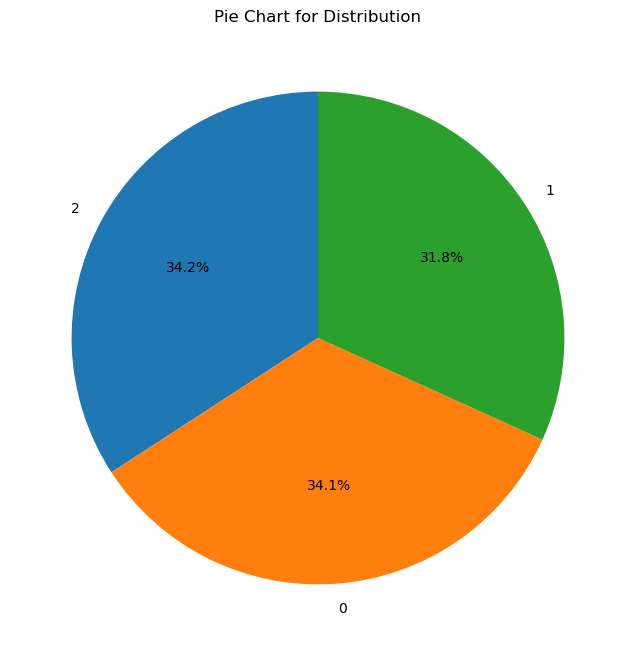

In [435]:
category_counts_y = y.value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(category_counts_y, labels=category_counts_y.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart for Distribution')
plt.show()

## Model

In [436]:
# Define the pipeline with preprocessing and classification steps
pipeline_KNN = Pipeline([
    ('classifierKNN', KNeighborsClassifier())
])

In [437]:
KNN_Base = pipeline_KNN.fit(X_train,y_train)
print('Pipeline steps : ', pipeline_KNN.steps)
pipeline_KNN

Pipeline steps :  [('classifierKNN', KNeighborsClassifier())]


Pipeline(steps=[('classifierKNN', KNeighborsClassifier())])

In [438]:
eval_results = {
    'name': [],
    'Cross Validation Mean': [],
    'f1 Score - Train': [],
    'f1 Score - Test': []
}
def model_evaluation(name, accuracy_mean, f1_train, f1_test):


    eval_results['name'].append(name)
    eval_results['Cross Validation Mean'].append(accuracy_mean)
    eval_results['f1 Score - Train'].append(f1_train)
    eval_results['f1 Score - Test'].append(f1_test)

In [439]:
# Create a function to check the performance
def performance_check(clf, X, y_pred):
  y_pred = clf.predict(X)

  return cross_val_score(clf, X, y_pred, cv=5)

In [440]:
%%time
print('Cross-validation - Train : ', performance_check(pipeline_KNN, X_train, y_train))
print('Cross-validation - Test  : ', performance_check(pipeline_KNN, X_test, y_test))

accuracy = cross_val_score(pipeline_KNN, X_train, y_train, cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100

y_pred_train = pipeline_KNN.predict(X_train)
y_pred_test = pipeline_KNN.predict(X_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('KNN Base', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

Cross-validation - Train :  [0.98319328 0.94957983 0.92372881 0.92372881 0.96610169]
Cross-validation - Test  :  [0.95       0.925      0.95       1.         0.92307692]
CPU times: total: 188 ms
Wall time: 164 ms


name,KNN Base
Cross Validation Mean,87.652542
f1 Score - Train,0.905389
f1 Score - Test,0.898665


In [441]:
%%time
param_KNN = {
    'classifierKNN__n_neighbors' : [3, 5, 7],
    'classifierKNN__weights' : ['uniform', 'distance'],
    'classifierKNN__metric' : ['euclidean', 'manhattan']
}

grid_KNN = GridSearchCV(pipeline_KNN, param_KNN, cv=5, scoring='accuracy', n_jobs=-1)
grid_KNN.fit(X_train, y_train)

print("Best parameters:", grid_KNN.best_params_)
print("Best Precision score:", grid_KNN.best_score_)

grid_KNN_Best = grid_KNN.best_estimator_

print('Cross-validation - Train : ', performance_check(grid_KNN_Best, X_train, y_train))
print('Cross-validation - Test  : ', performance_check(grid_KNN_Best, X_test, y_test))

accuracy = cross_val_score(grid_KNN_Best, X_train, y_train, scoring='accuracy', cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100

y_pred_train = grid_KNN_Best.predict(X_train)
y_pred_test = grid_KNN_Best.predict(X_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('KNN Grid Search Hyperparameter Tuning', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

Best parameters: {'classifierKNN__metric': 'euclidean', 'classifierKNN__n_neighbors': 3, 'classifierKNN__weights': 'distance'}
Best Precision score: 0.8850448654037887
Cross-validation - Train :  [0.92436975 0.89915966 0.86440678 0.83898305 0.89830508]
Cross-validation - Test  :  [0.95       0.925      0.875      0.97435897 0.92307692]
CPU times: total: 141 ms
Wall time: 198 ms


name,KNN Base,KNN Grid Search Hyperparameter Tuning
Cross Validation Mean,87.652542,88.500000
f1 Score - Train,0.905389,1.000000
f1 Score - Test,0.898665,0.893639


In [442]:
%%time
rscv_KNN = RandomizedSearchCV(pipeline_KNN, 
                                param_KNN,
                                n_iter=50,
                                cv=5,
                                random_state=46,
                                n_jobs=-1,
                                scoring='f1')
rscv_KNN.fit(X_train, y_train)

print("Best parameters:", rscv_KNN.best_params_)
rscv_KNN_Best = rscv_KNN.best_estimator_

y_pred_train = rscv_KNN_Best.predict(X_train)
y_pred_test = rscv_KNN_Best.predict(X_test)

print('\n')

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test, average='micro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')

accuracy = cross_val_score(rscv_KNN, X_train, y_train, scoring='accuracy', cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100


f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('KNN RandomCV Best Param', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

Best parameters: {'classifierKNN__weights': 'uniform', 'classifierKNN__n_neighbors': 3, 'classifierKNN__metric': 'euclidean'}


F1 Score - Test Set   :  0.898989898989899 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        67
           1       0.90      0.84      0.87        63
           2       0.93      0.91      0.92        68

    accuracy                           0.90       198
   macro avg       0.90      0.90      0.90       198
weighted avg       0.90      0.90      0.90       198
 

CPU times: total: 156 ms
Wall time: 1.11 s


name,KNN Base,KNN Grid Search Hyperparameter Tuning,KNN RandomCV Best Param
Cross Validation Mean,87.652542,88.500000,87.997175
f1 Score - Train,0.905389,1.000000,0.922346
f1 Score - Test,0.898665,0.893639,0.898640


In [443]:
Model_evaluation_df_sorted = eval_results_df.sort_values(by='Cross Validation Mean', ascending=False)
Model_evaluation_df_sorted

,name,Cross Validation Mean,f1 Score - Train,f1 Score - Test
1,KNN Grid Search Hyperparameter Tuning,88.500000,1.000000,0.893639
2,KNN RandomCV Best Param,87.997175,0.922346,0.898640
0,KNN Base,87.652542,0.905389,0.898665


Model Saving

In [444]:
with open('model.pkl', 'wb') as file_1:
    pickle.dump(grid_KNN_Best, file_1)

## Model Testing

In [445]:
pipeline_KNN.predict(X_test) #Xtrain diganti data inference

array([0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1,
       1, 1, 2, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2,
       0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 2, 0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 2, 1, 0, 0, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 1,
       0, 0, 1, 2, 2, 0, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1,
       1, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 2, 2, 1,
       2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 1,
       2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2],
      dtype=int64)

In [446]:
X_train.iloc[0].to_dict()

{'Gender': 1,
 'Age': 21,
 'anxiety_level': 20,
 'self_esteem': 13,
 'depression': 8,
 'headache': 0,
 'safety': 1,
 'social_support': 1}

In [448]:
X_test.iloc[0].to_dict()

{'Gender': 0,
 'Age': 41,
 'anxiety_level': 6,
 'self_esteem': 25,
 'depression': 6,
 'headache': 1,
 'safety': 4,
 'social_support': 3}

In [447]:
# Load the saved model from model.pkl
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Make inference on the test set
y_pred_inference = loaded_model.predict(X_test)

# Show the first 10 predictions
print("First 10 predictions:", y_pred_inference[:10])

First 10 predictions: [0 1 0 2 0 0 0 0 0 0]
